# EDA

## IMPORTAR PAQUETES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [8]:
ruta_proyecto = 'C:/Usuarios/Alfredo/DS4B/Python DS Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/07_CASOS/02_RETAIL'

Nombres de los ficheros de datos.

In [9]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [10]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

No incluímos la variable 'd' ya que va a tener demasiados valores.

In [11]:
cat.columns.to_list()

['store_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [12]:
incluir = cat.columns.to_list()
del incluir[2]

In [14]:
def frecuencias_cat(df_cat):
    # Asegúrate de que todas las columnas son de tipo 'str' para evitar problemas de comparación
    df_cat = df_cat.astype(str)
    
    resultado = df_cat.apply(lambda x: x.value_counts(normalize=True)) \
                      .T.stack() \
                      .to_frame().reset_index() \
                      .rename(columns={'level_0': 'Variable', 'level_1': 'Valor', 0: "Frecuencia"}) \
                      .sort_values(by=['Variable', 'Frecuencia'])
    return resultado


In [15]:
pd.set_option('display.max_rows', None)

frecuencias_cat(cat[incluir])

,Variable,Valor,Frecuencia
41,event_name_1,Chanukah End,0.001880
42,event_name_1,Christmas,0.001880
43,event_name_1,Cinco De Mayo,0.001880
48,event_name_1,Father's day,0.001880
61,event_name_1,OrthodoxEaster,0.001880
44,event_name_1,ColumbusDay,0.002820
45,event_name_1,Easter,0.002820
46,event_name_1,Eid al-Fitr,0.002820
47,event_name_1,EidAlAdha,0.002820
49,event_name_1,Halloween,0.002820


In [16]:
pd.set_option('display.max_rows', 6)

### Análisis gráfico

In [17]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

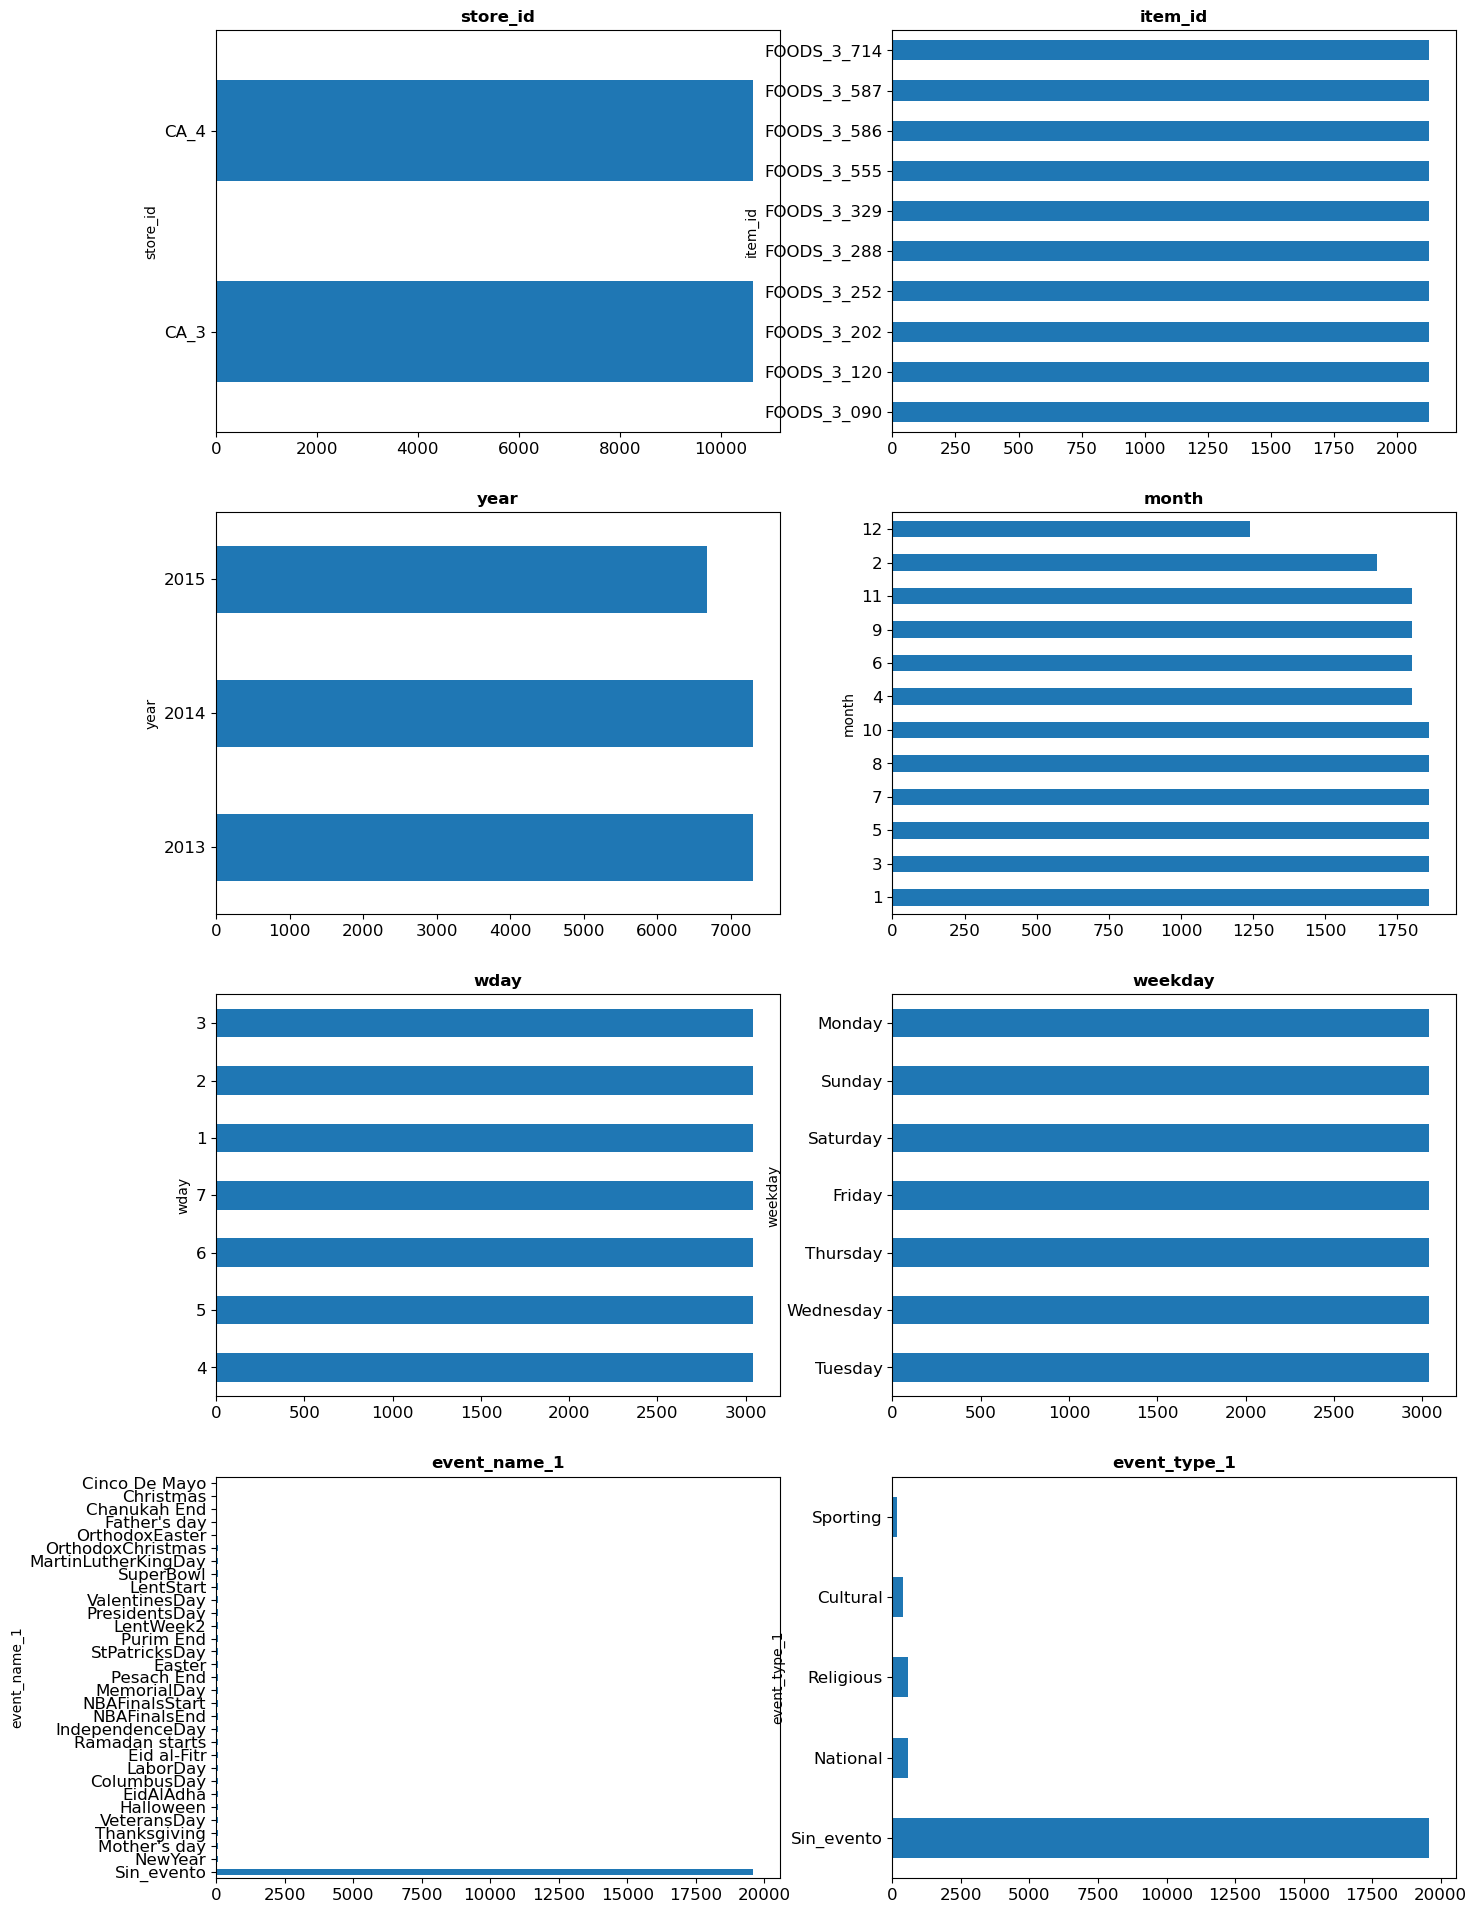

In [17]:
graficos_eda_categoricos(cat[incluir])

## EDA NUMÉRICAS

### Análisis estadístico

In [18]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [19]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,11420.00,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
ventas,21280.0,28.874577,18.00,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21280.0,2.394261,1.58,1.236042,1.0,1.5,1.58,2.98,4.98


### Análisis gráfico

En este caso el análisis gráfico que tiene más sentido es el de ventas y precios por diferentes dimensiones.

Así que primero necesitamos volver a unir los dos dataframes.

In [20]:
df = pd.concat([cat,num], axis=1)

df.head()

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,wm_yr_wk,ventas,sell_price
date,,,,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.25
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National,11249,33,1.25
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_252,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_288,d_704,2013,1,4,Tuesday,NewYear,National,11249,20,4.28


#### Tendencia global de las ventas

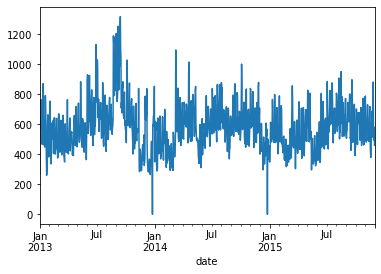

In [21]:
df.groupby('date').ventas.sum().plot();

#### Tendencia de las ventas por producto

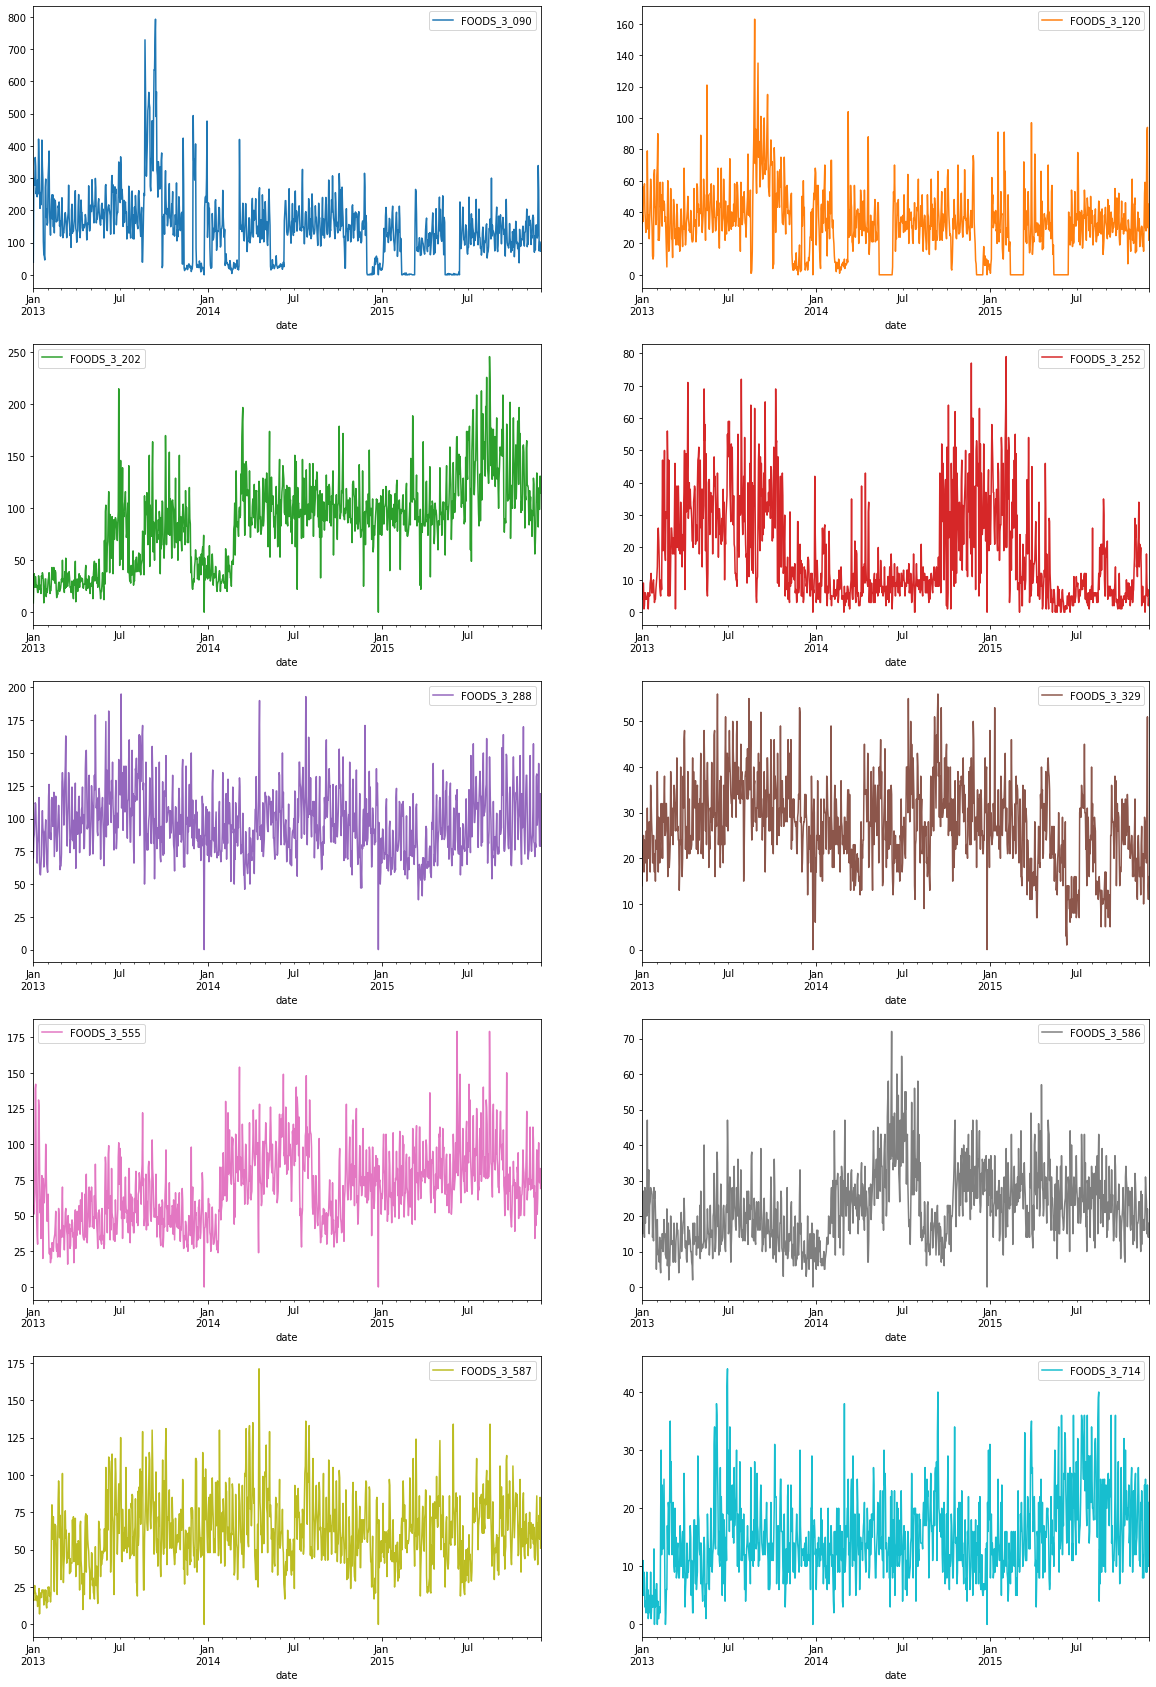

In [23]:
df.groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### Tendencia de las ventas por tienda y producto

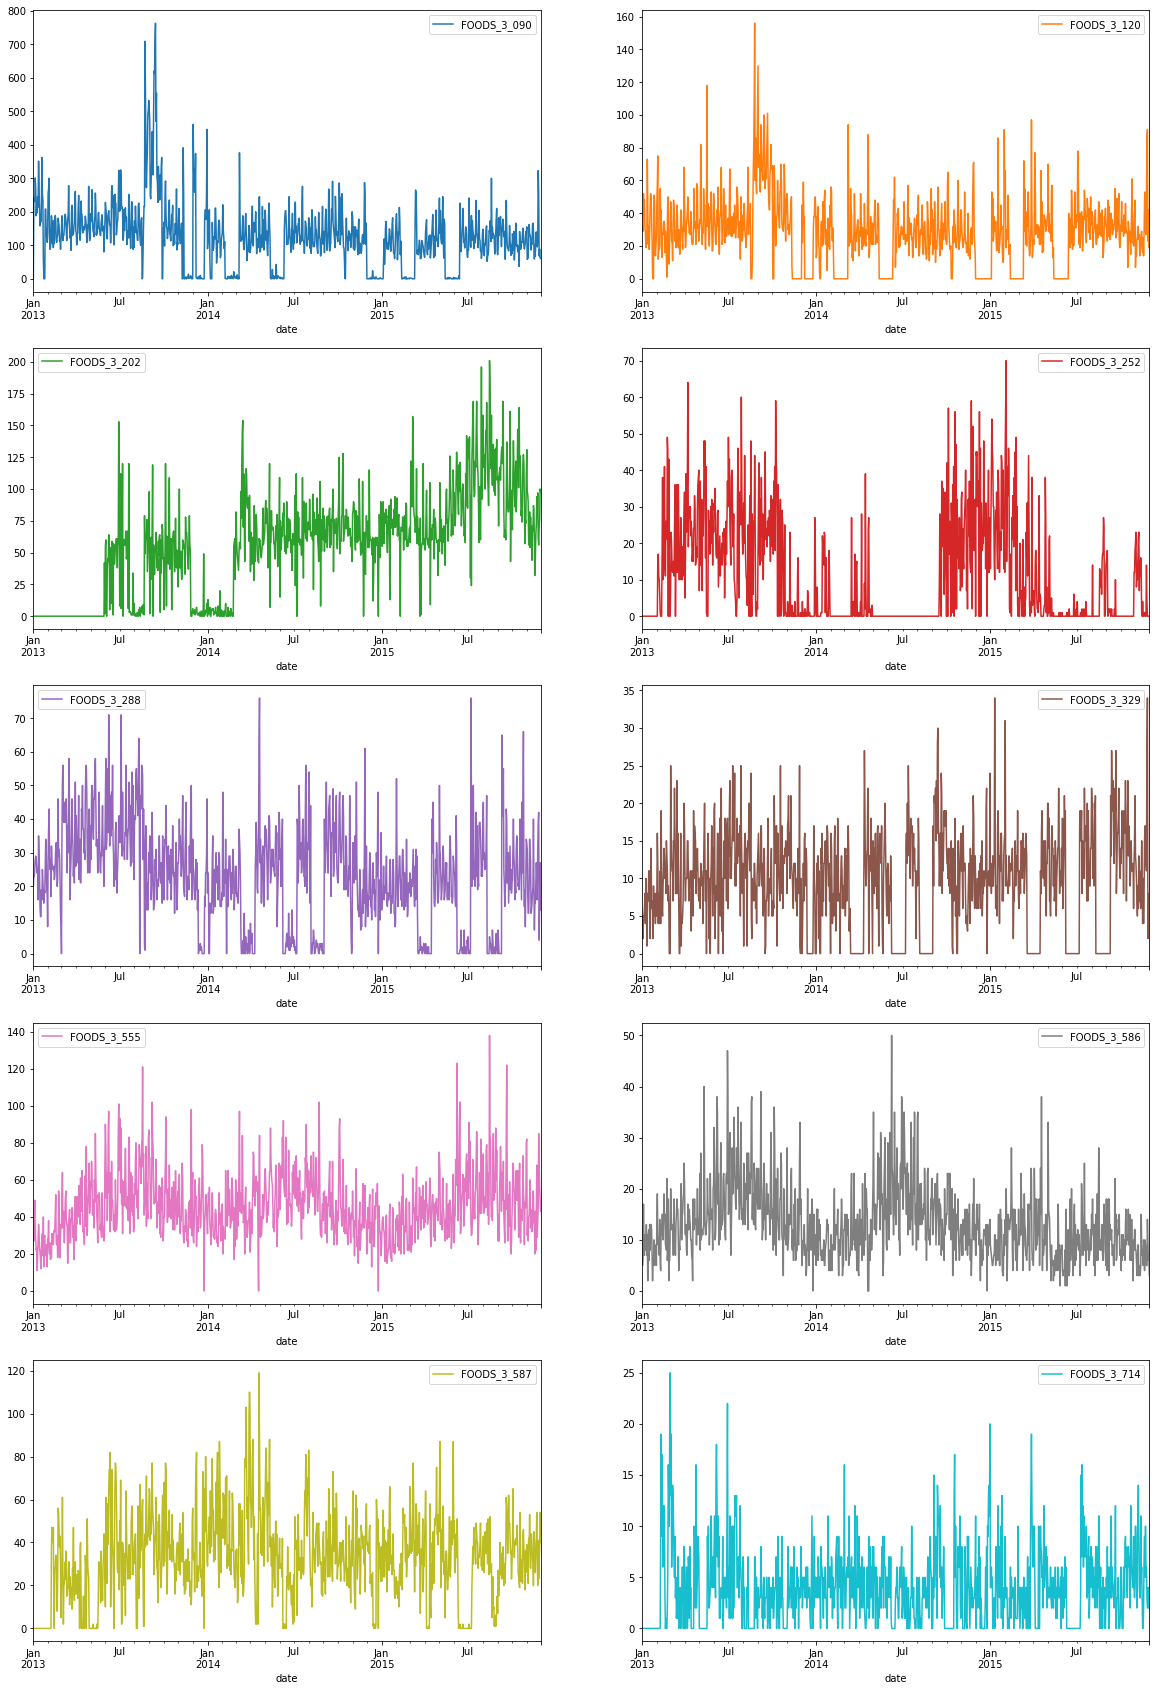

In [24]:
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

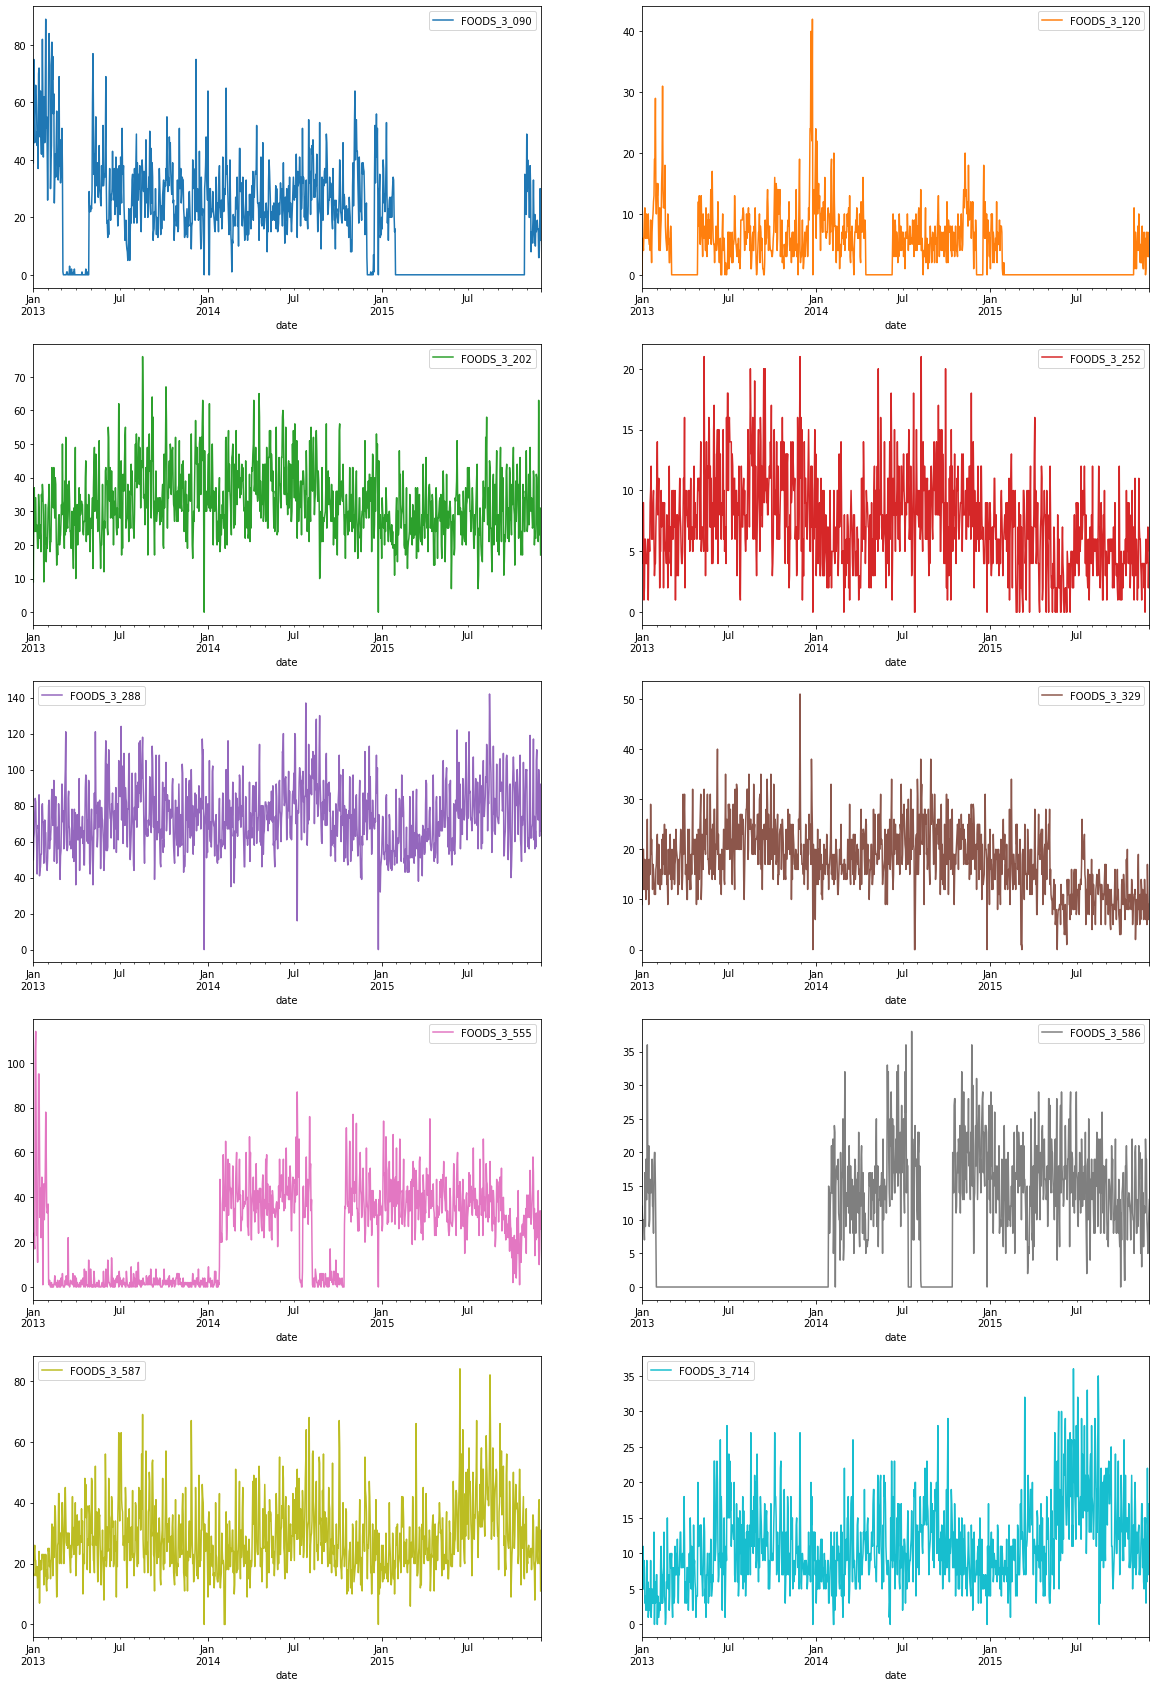

In [25]:
df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

Conclusiones:

* Estructura jerárquica (forecast a nivel de tienda y producto)
* Hay productos nuevos a nivel de tienda (por ejemplo FOOD_3_202 en la tienda CA_3)
* Aunque no a nivel general, por lo que podríamos pensar que no son realmente productos nuevos si no demanda intermitente (en el de FOOD_3_202 sí hay ventas al comienzo del período en la tienda CA_4)
* Hay demanda o venta intermitente
    * No sabemos la causa: falta de demanda, retirada del mercado o rotura de stock

Acciones:

* Modelizar a nivel tienda producto
* Crear una variable que capture el efecto de la demanda intermitente para que el modelo predictivo funcione OK
* Utilizar algoritmos basados en árboles y rápidos: XGBoost o lightGBM. Dado que son muchos modelos (2 tiendas con 10 productos cada una -- 20 modelos).

#### Tendencia del precio por producto y por tienda

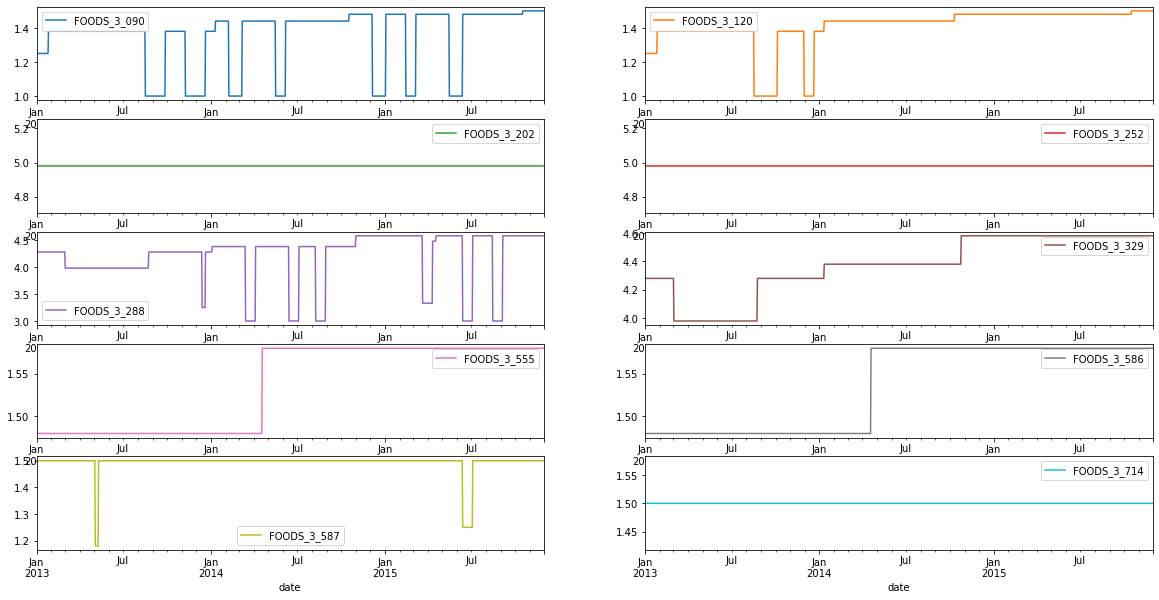

In [30]:
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).sell_price.mean().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));

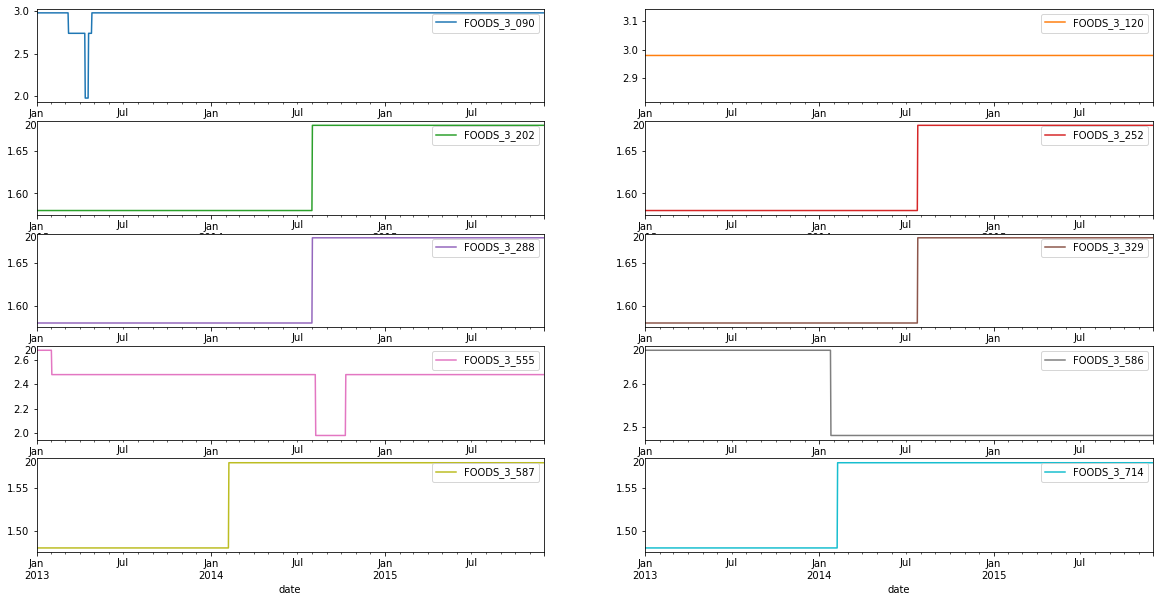

In [31]:
df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).sell_price.mean().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));

Conclusiones:

* Las políticas de precio varían mucho por producto, especialmente  en la tienda CA_3
* Parece que las promociones son frecuentes
* Sería muy útil disponer de un calendario de promociones

#### Estacionalidad por producto

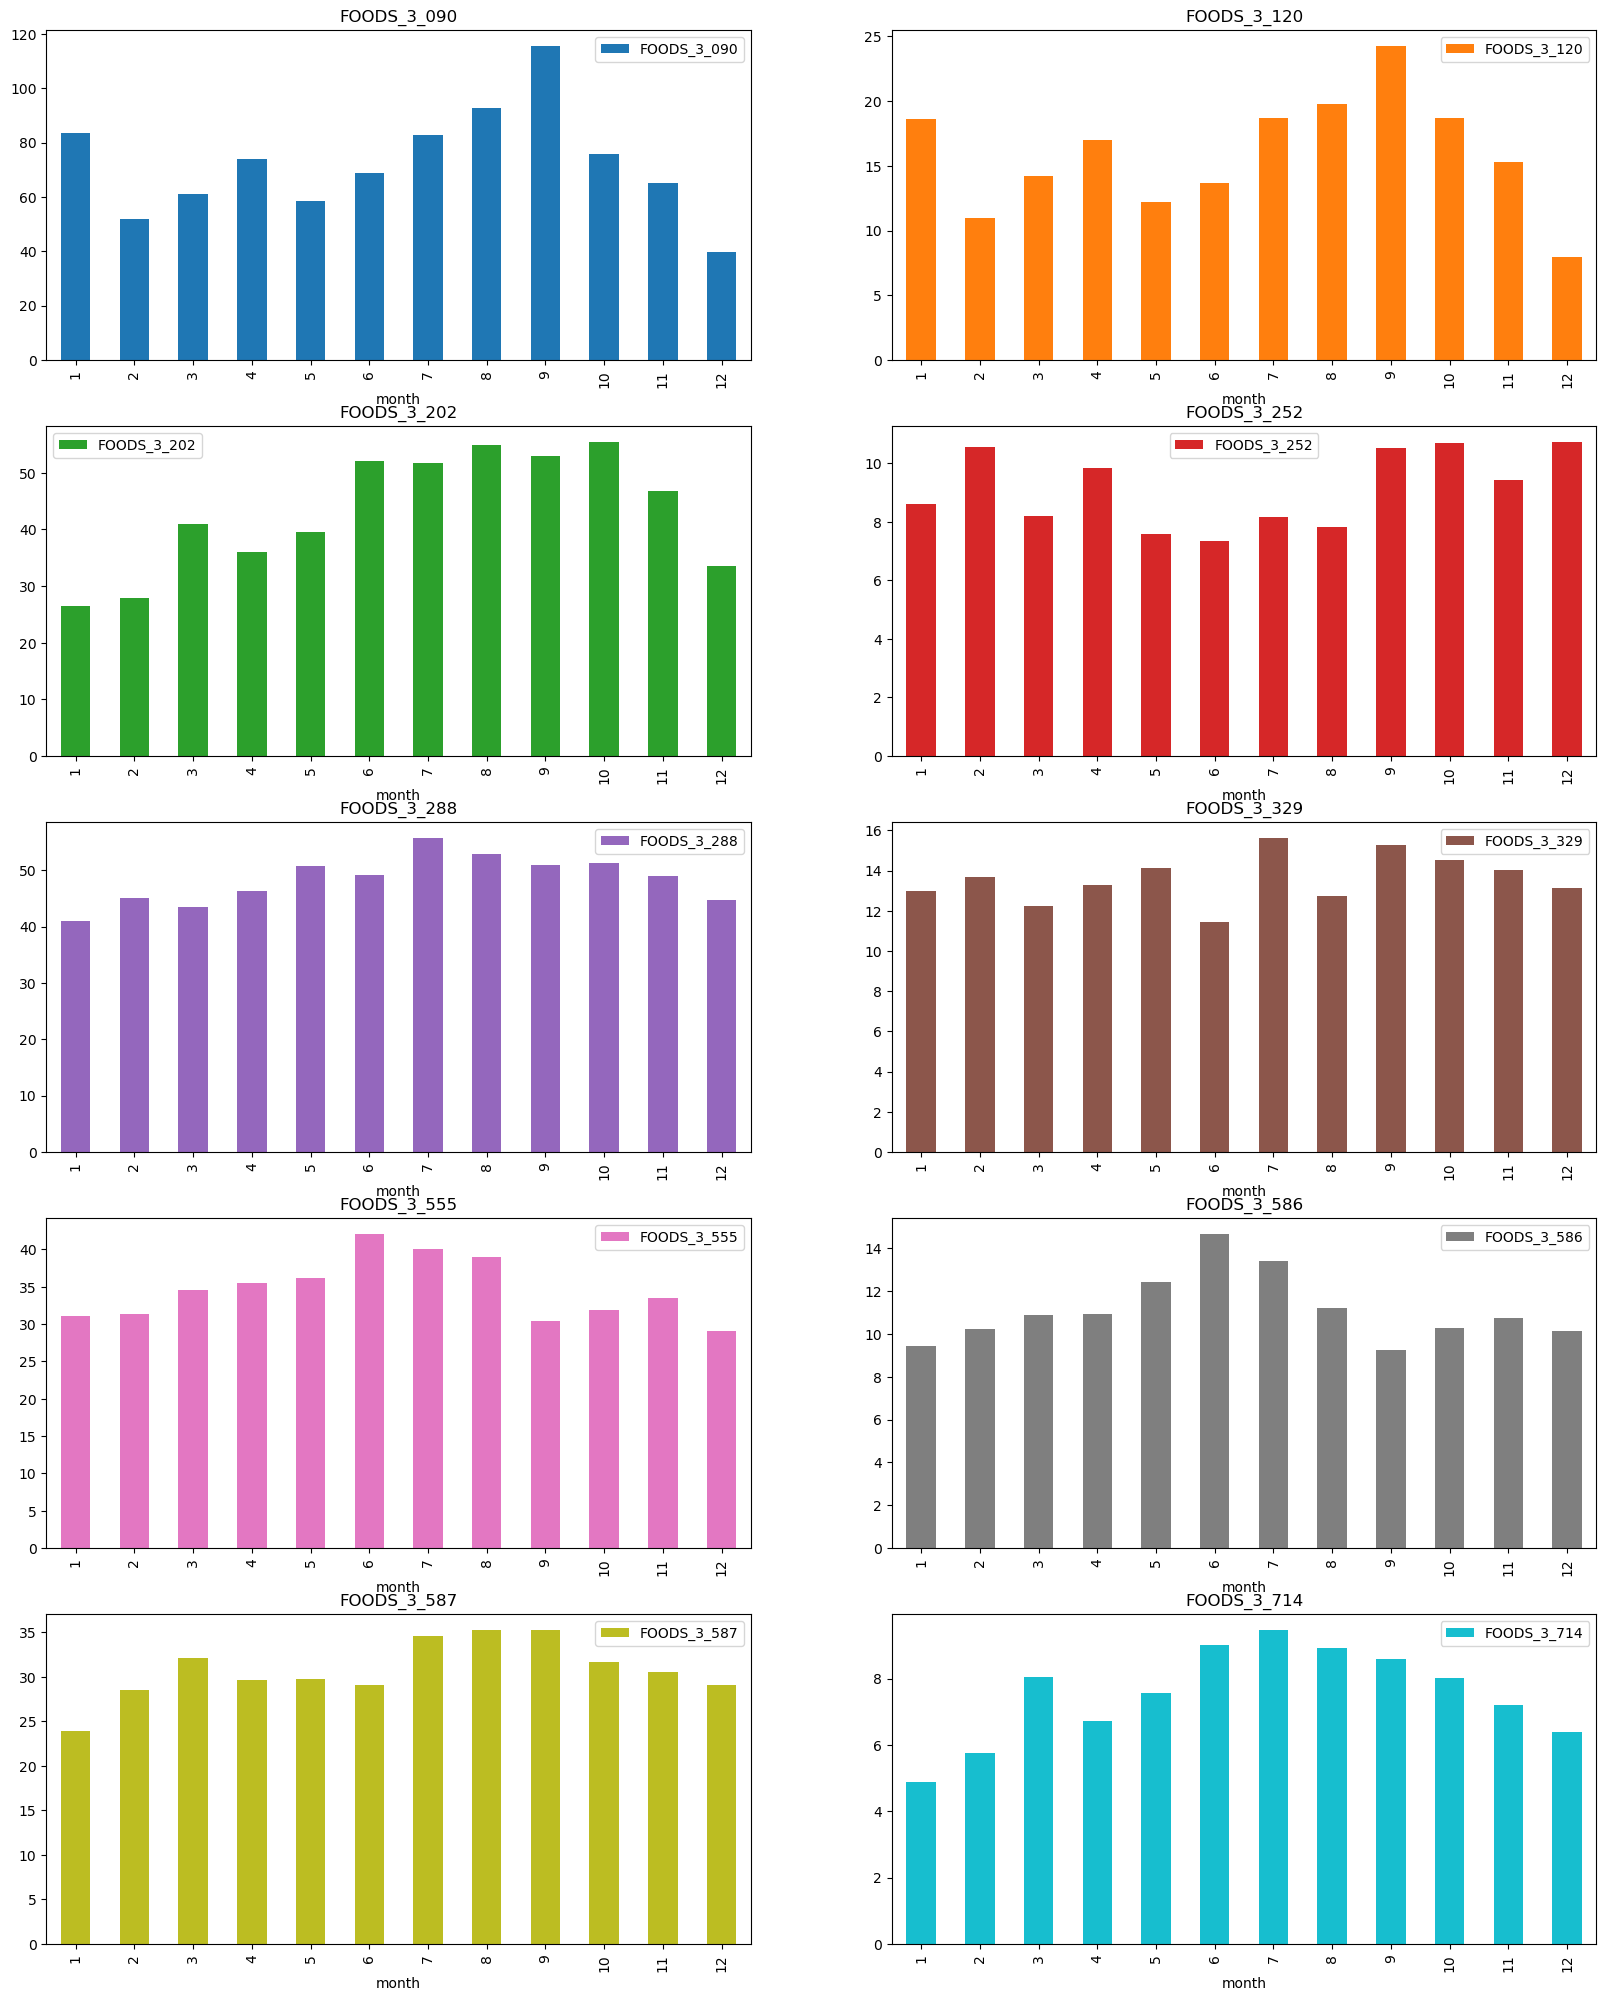

In [26]:
df.groupby(['month','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

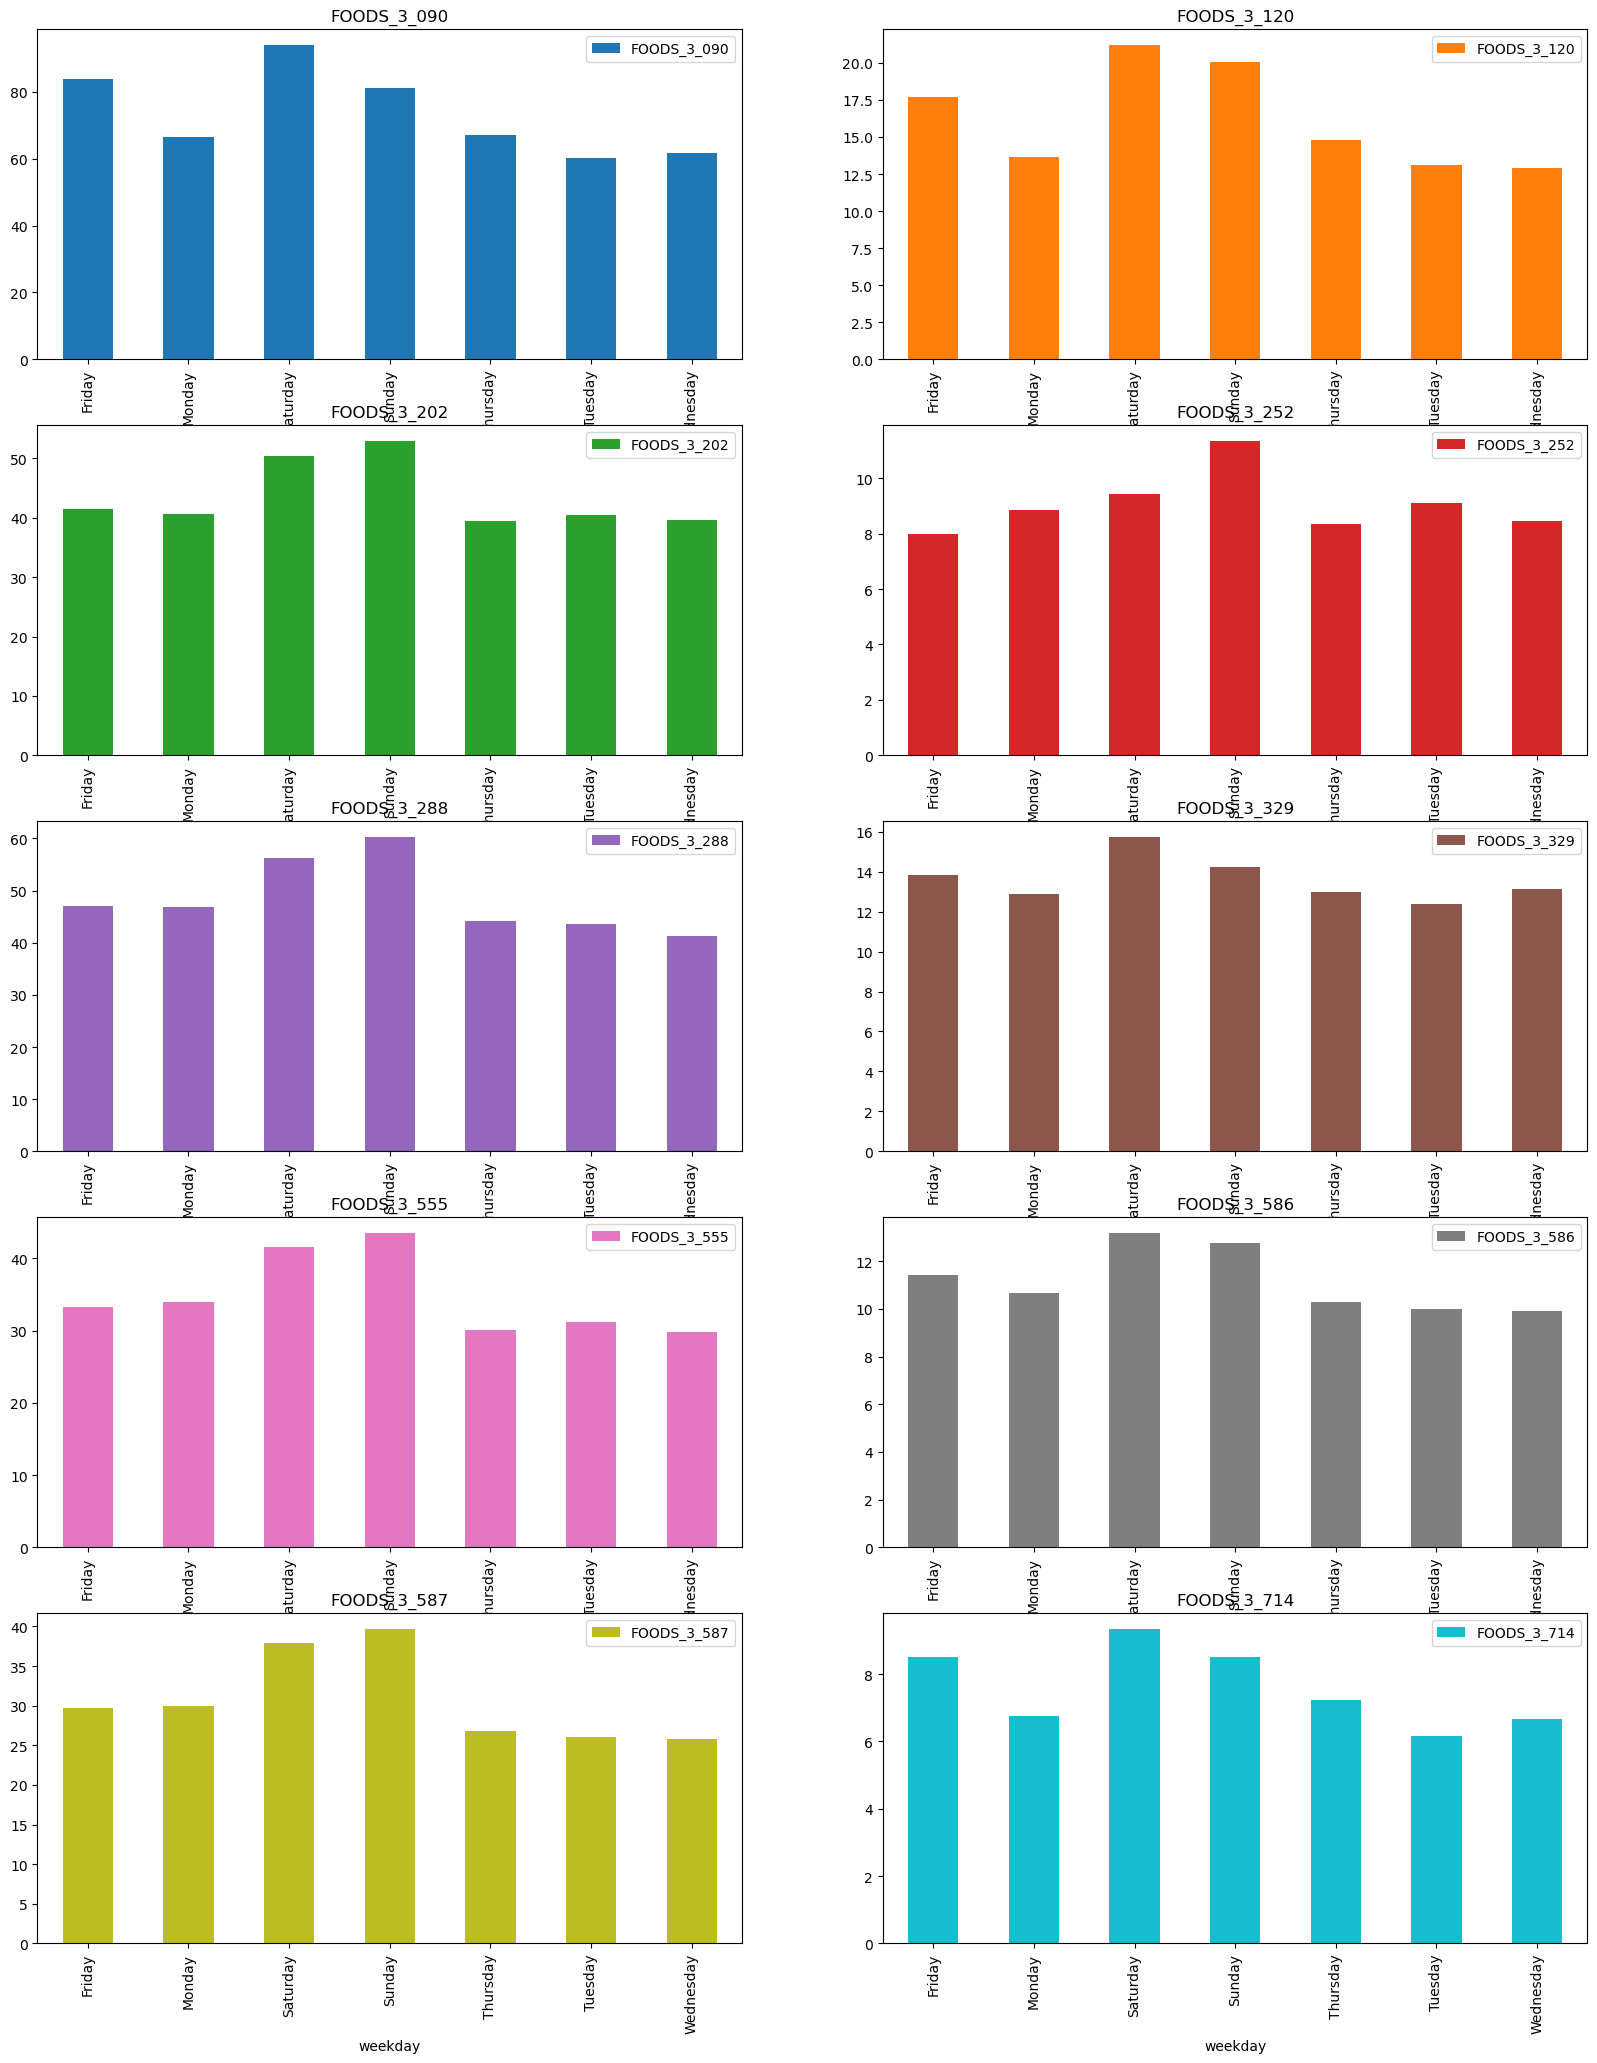

In [27]:
df.groupby(['weekday','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

#### Estacionalidad por evento

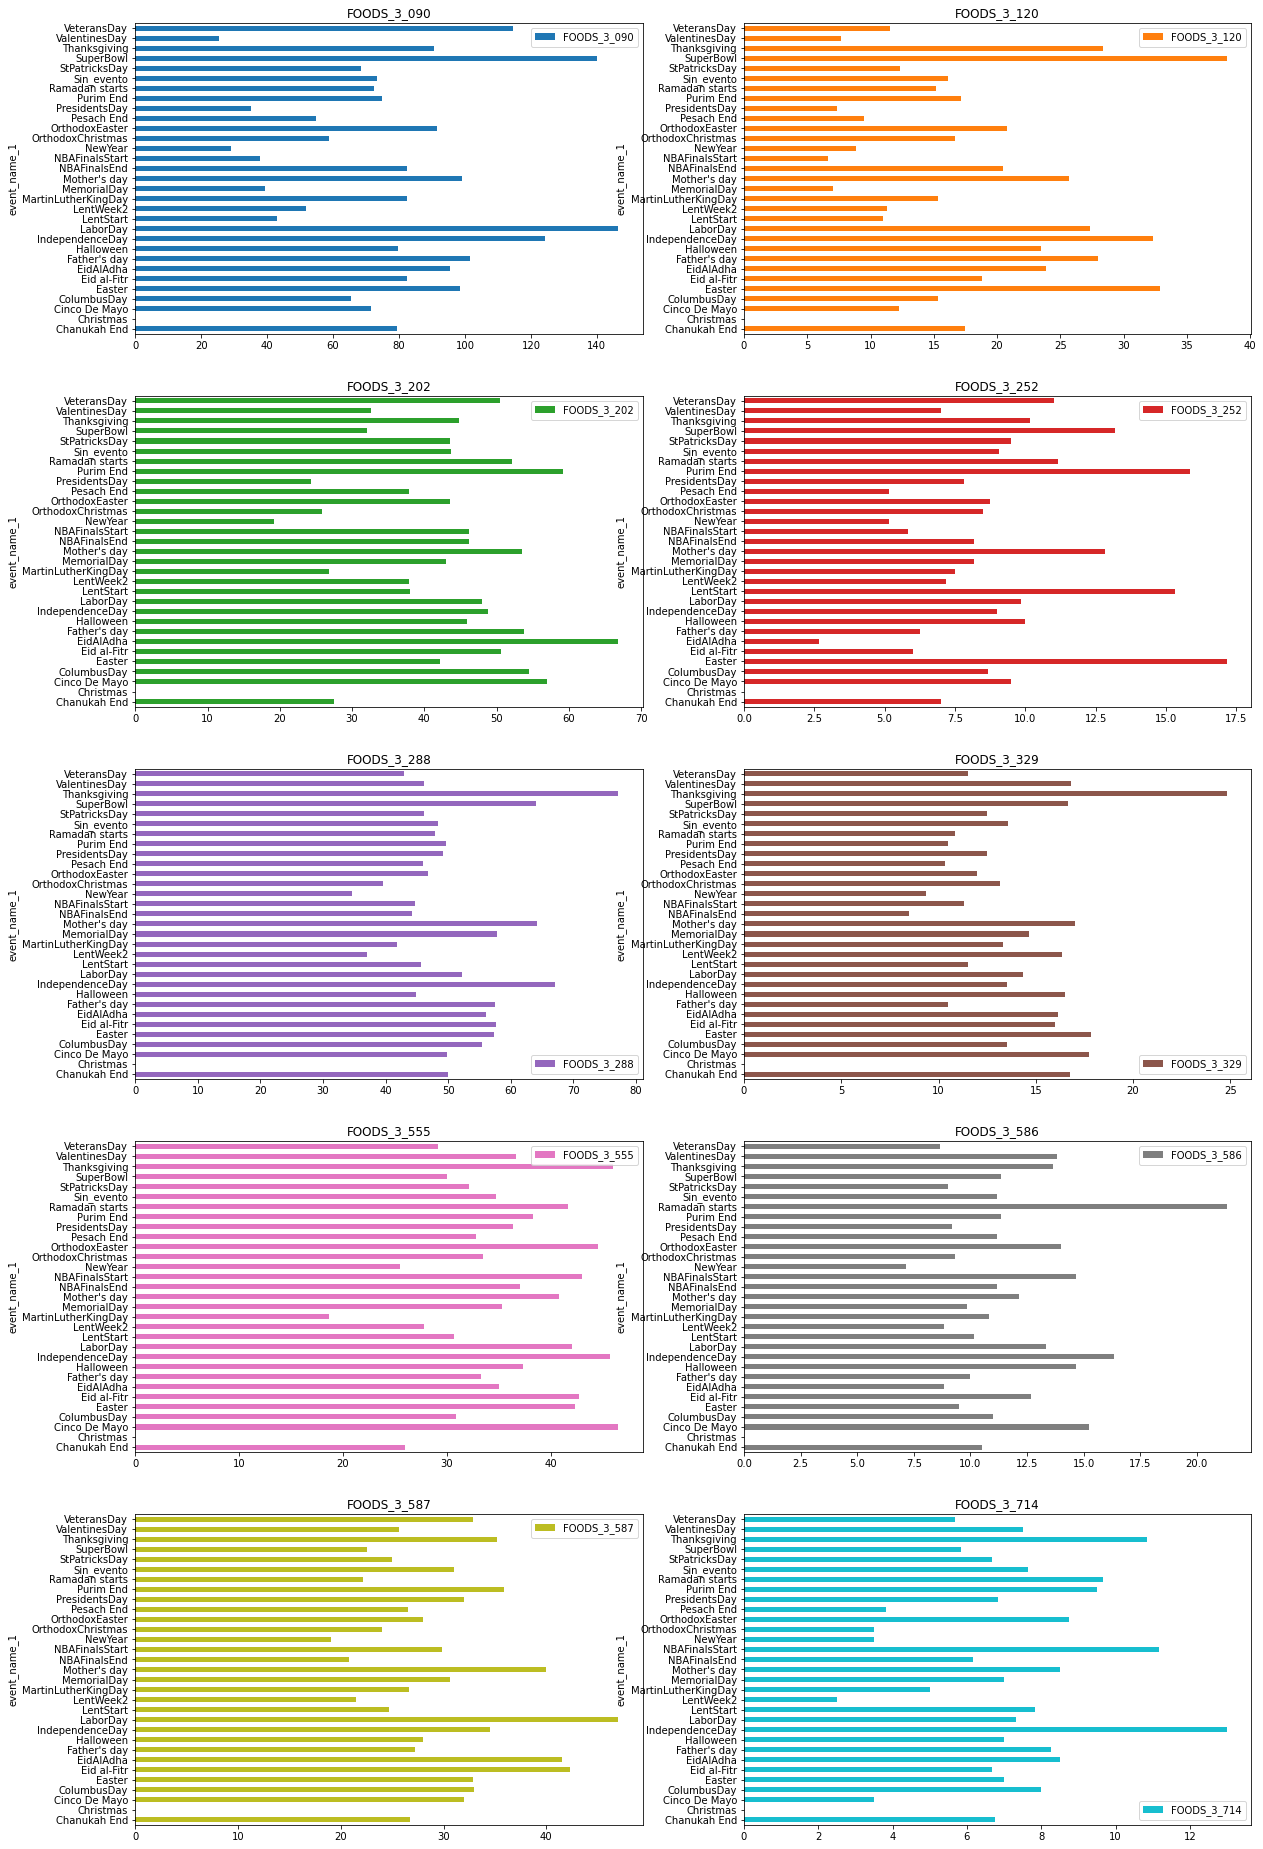

In [32]:
df.groupby(['event_name_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

#### Estacionalidad por tipo de evento

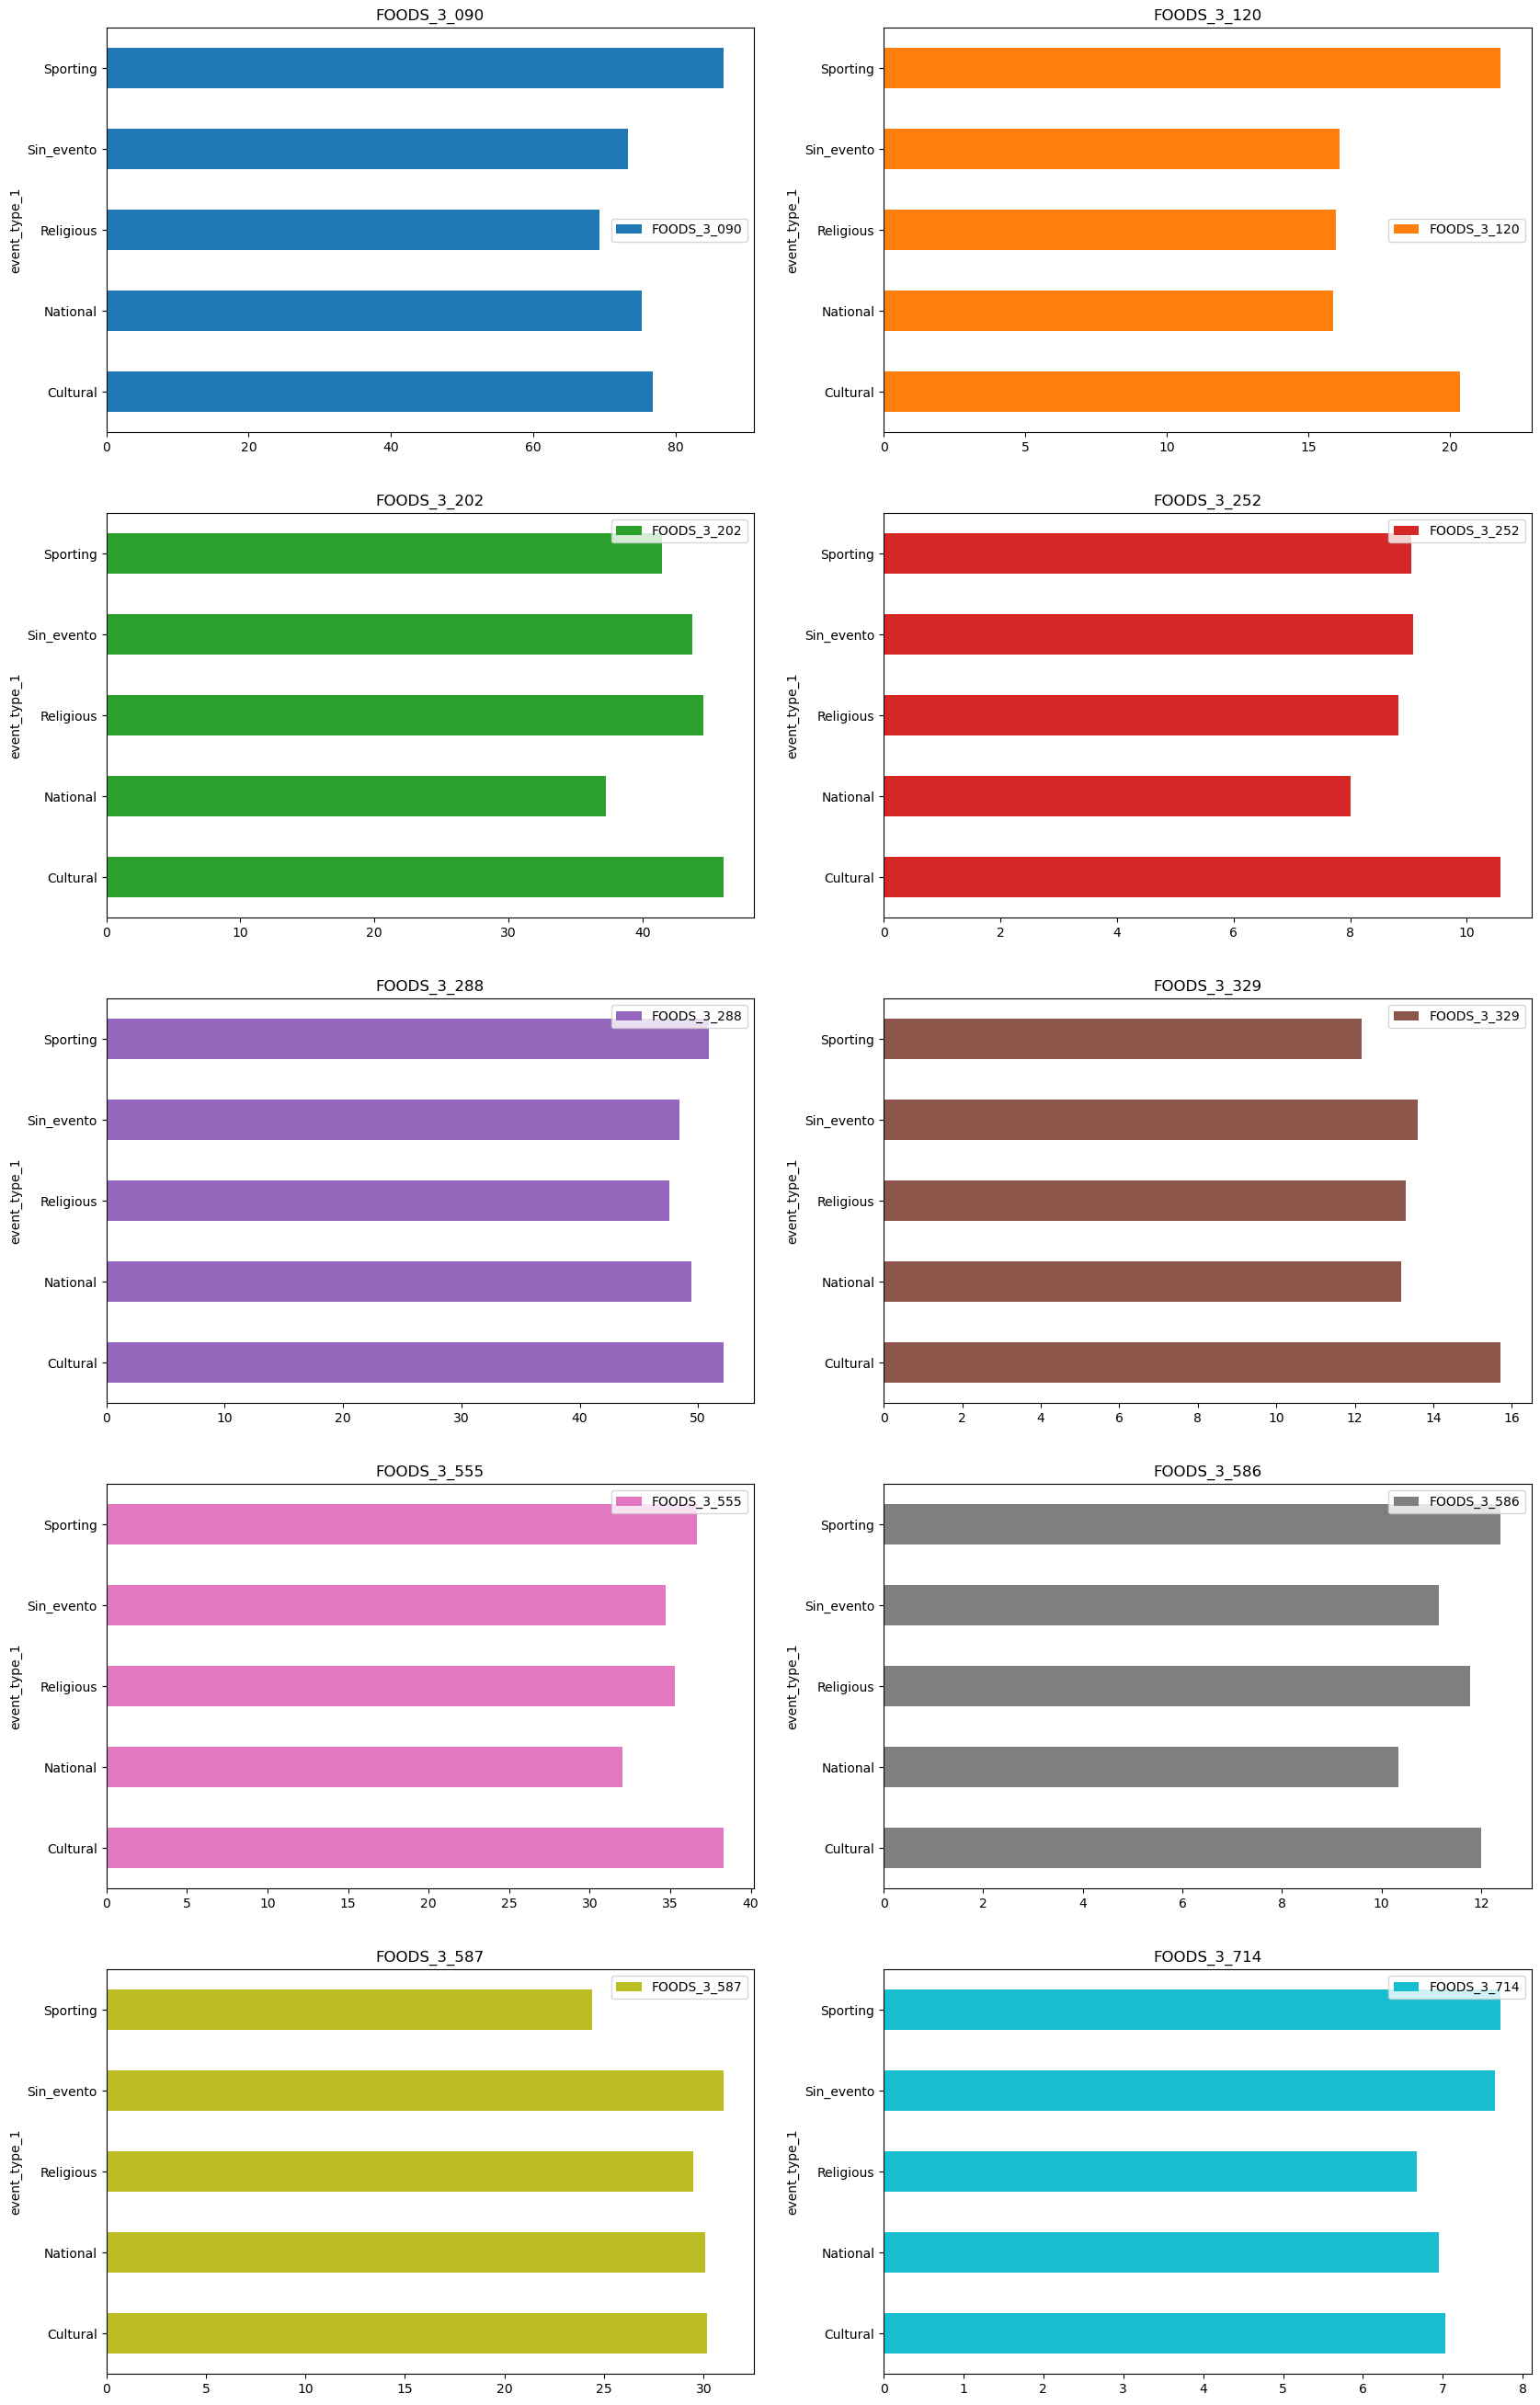

In [29]:
df.groupby(['event_type_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

Conclusiones:

* Todas estas variables sí parecen afectar lo cual es buena noticia

## GUARDAR DATASETS TRAS EDA

Aunque para este caso no se cambió nada en EDA

In [33]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [34]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)